<a href="https://colab.research.google.com/github/gurpreetsahotasingh288-gif/Swiggy_Sql/blob/main/TITANIC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [59]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [60]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [61]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [62]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [63]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [64]:
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [65]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [66]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()

In [67]:
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

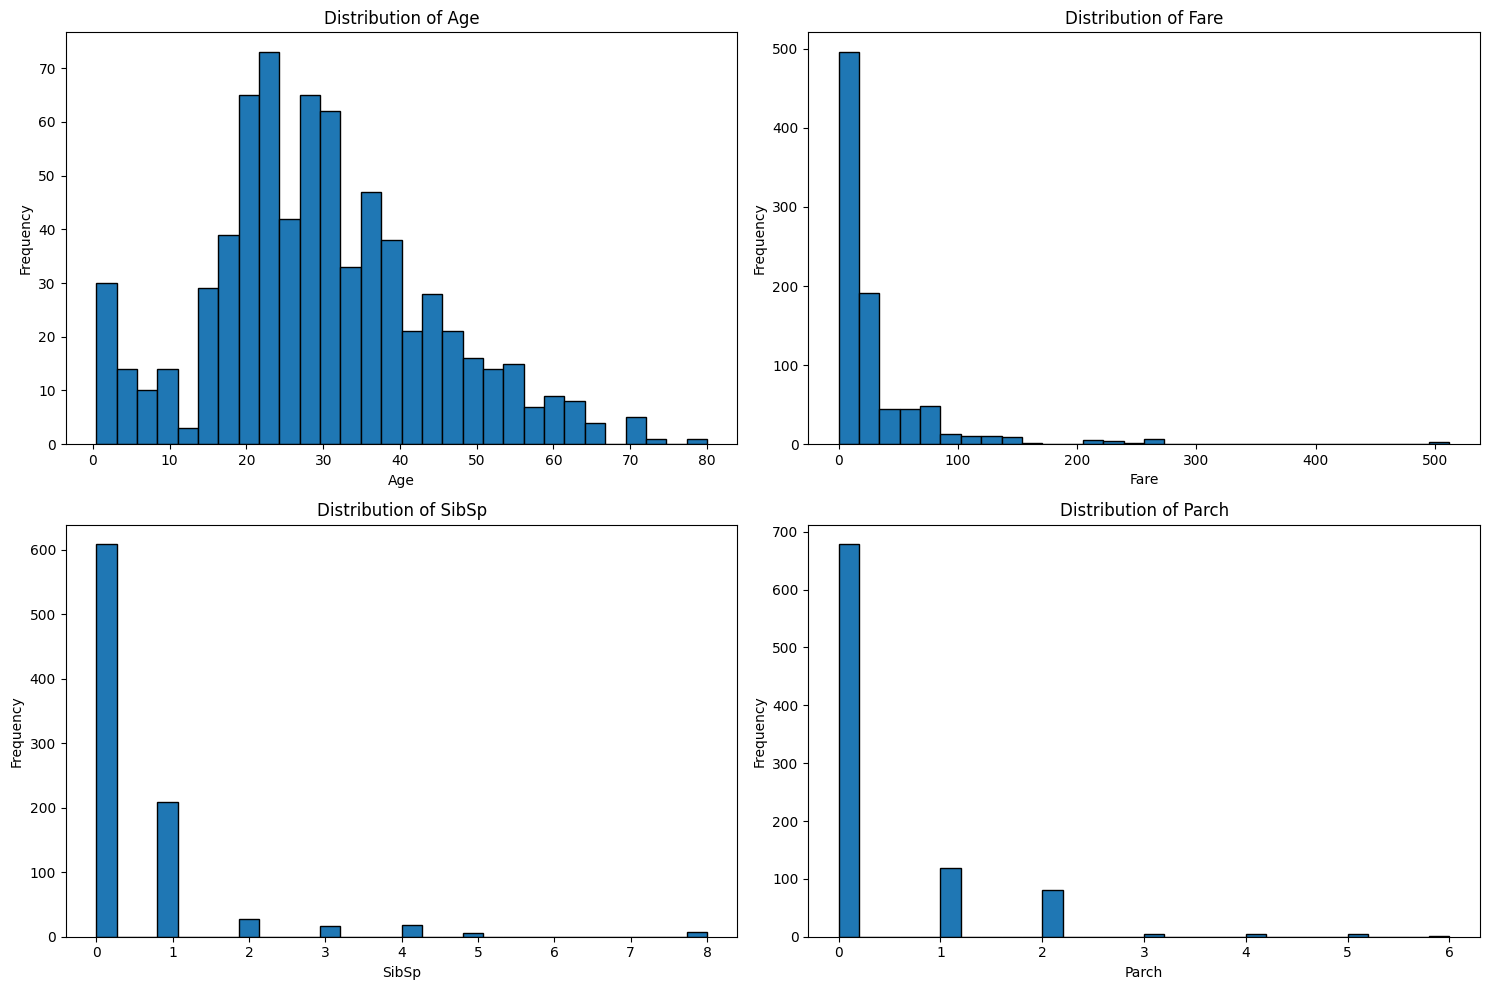

In [68]:
numerical_cols=['Age','Fare','SibSp','Parch']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)  # Arrange plots in a 2x2 grid
    plt.hist(df[col].dropna(), bins=30, edgecolor='black') # .dropna() to handle missing values for histogram
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [69]:
numerical_cols

['Age', 'Fare', 'SibSp', 'Parch']

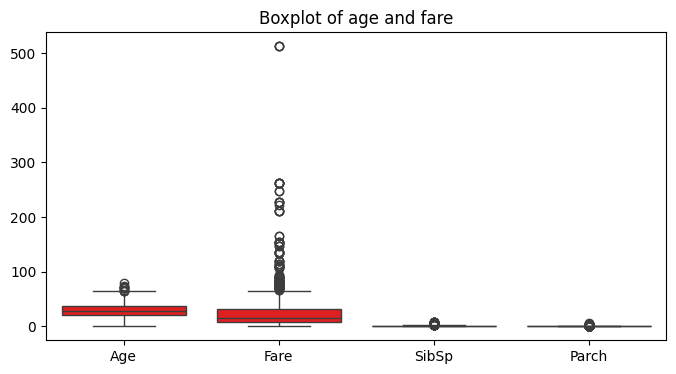

In [70]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerical_cols],color='red')
plt.title('Boxplot of age and fare')
plt.show()

/tmp/ipython-input-1103707027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')


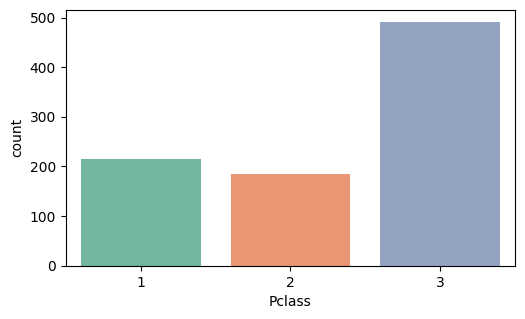

/tmp/ipython-input-1103707027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')


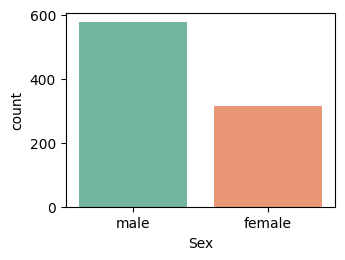

/tmp/ipython-input-1103707027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')


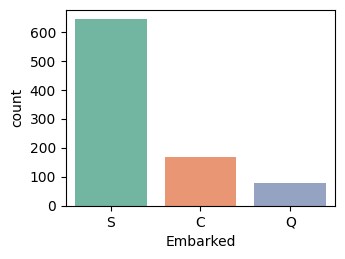

/tmp/ipython-input-1103707027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')


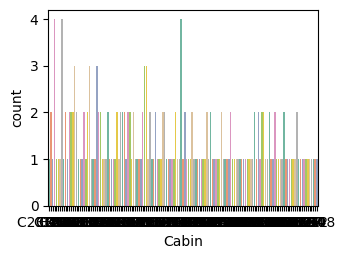

In [71]:
cat_cols=['Pclass','Sex','Embarked','Cabin']
plt.figure(figsize=(10,6))
for i,col in enumerate(cat_cols):
  plt.subplot(2,2,i+1)
  sns.countplot(data=df,x=col,palette='Set2')
  plt.tight_layout()
  plt.show()

/tmp/ipython-input-1796556906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=df,palette='Set1')


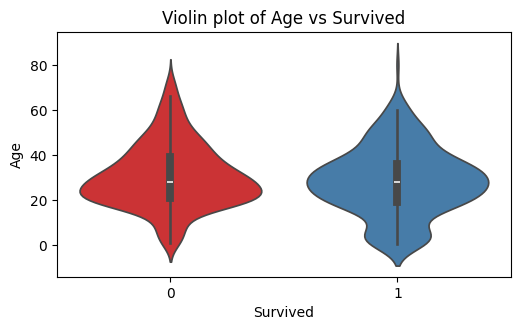

/tmp/ipython-input-1796556906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=df,palette='Set1')


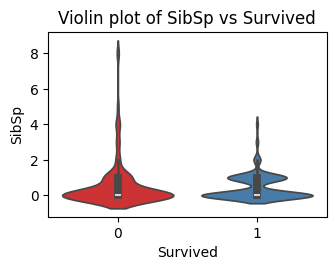

/tmp/ipython-input-1796556906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=df,palette='Set1')


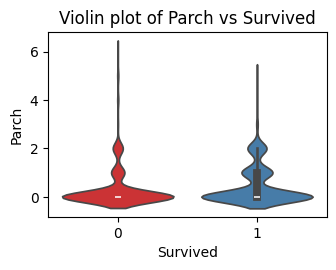

/tmp/ipython-input-1796556906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived',y=col,data=df,palette='Set1')


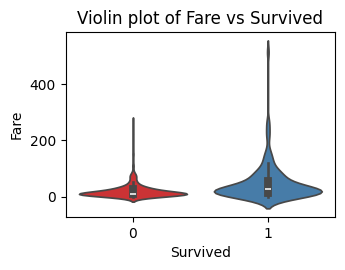

In [72]:
num_colss=['Age','SibSp','Parch','Fare']
plt.figure(figsize=(10,6))
for i,col in enumerate(num_colss):
  plt.subplot(2,2,i+1)
  sns.violinplot(x='Survived',y=col,data=df,palette='Set1')
  plt.title(f"Violin plot of {col} vs Survived")
  plt.tight_layout()
  plt.show()

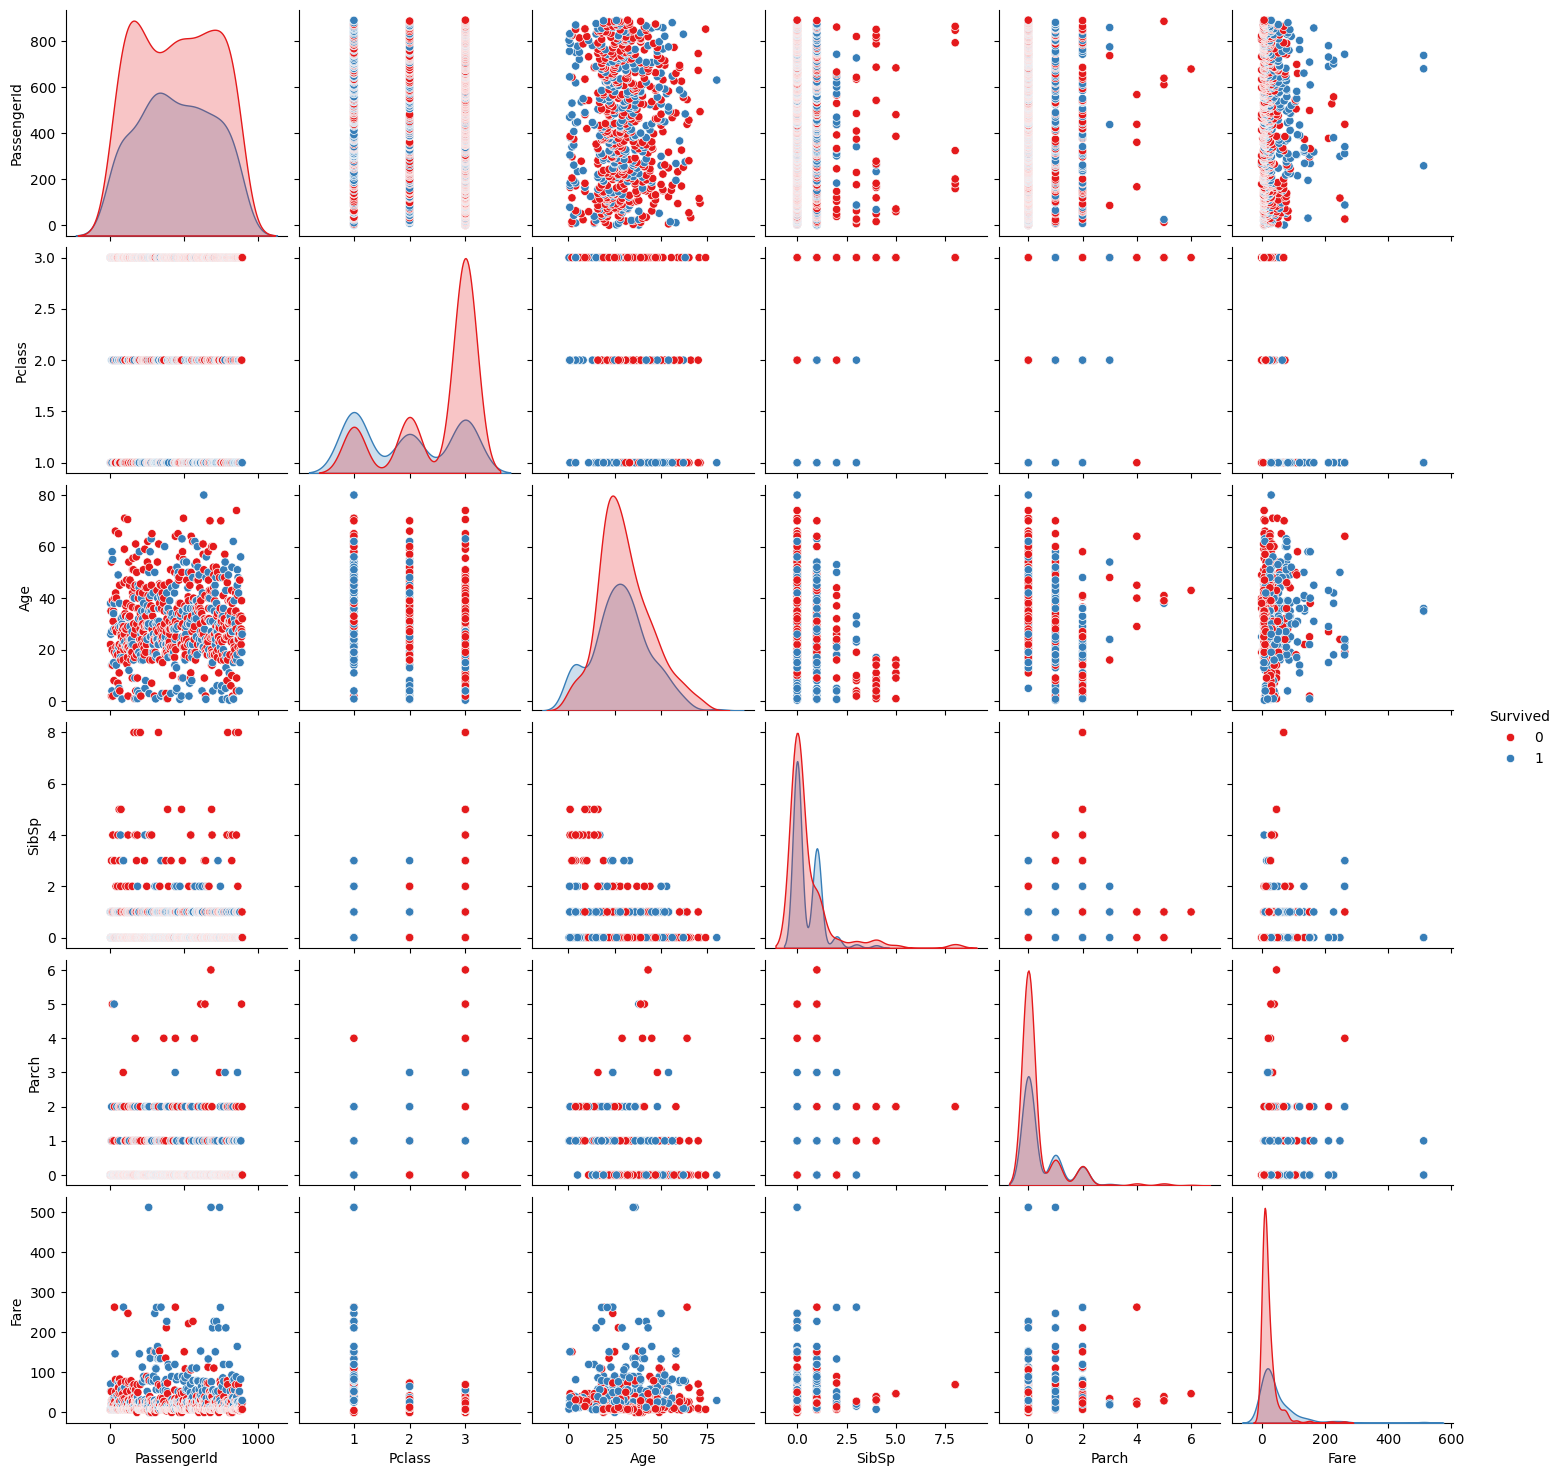

In [73]:
sns.pairplot(df[num_cols],hue='Survived',palette='Set1')
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [75]:
le=LabelEncoder()
for x in df.columns:
  if df[x].dtype=='object':
    df[x]=le.fit_transform(df[x])

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


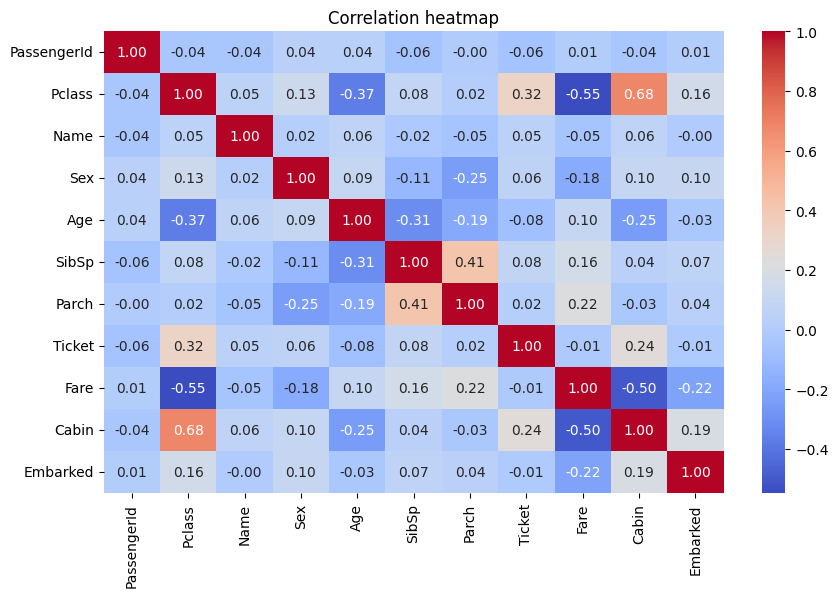

In [77]:
plt.figure(figsize=(10,6))
correlation_matrix = df.drop(columns='Survived').corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

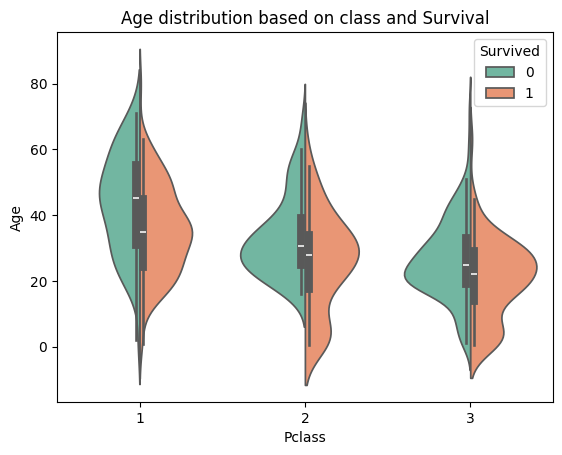

In [78]:
sns.violinplot(data=df,x="Pclass",y="Age",hue="Survived",split=True,palette="Set2")
plt.title("Age distribution based on class and Survival")
plt.show()

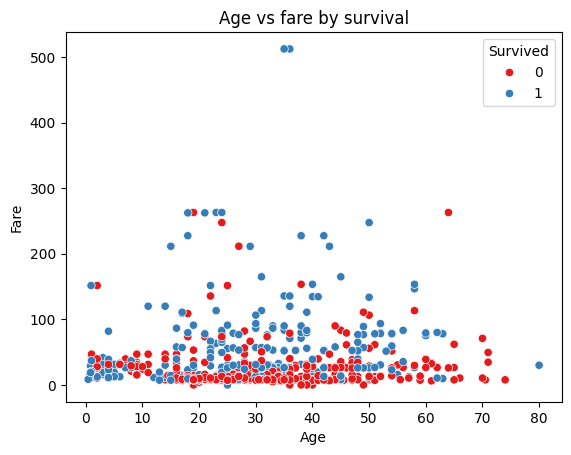

In [79]:
sns.scatterplot(data=df,x="Age",y="Fare",hue="Survived",palette="Set1")
plt.title("Age vs fare by survival")
plt.show()

In [80]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [81]:
df.dropna(inplace=True)

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df.drop(columns=['PassengerId','Cabin','Ticket','Name','SibSp','Parch'],axis=1,inplace=True)

In [84]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,1
886,0,2,1,27.0,13.0000,2
887,1,1,0,19.0,30.0000,2
889,1,1,1,26.0,30.0000,0


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X=df.drop(columns=["Survived"])
y=df['Survived']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [91]:
X_train_scaled

array([[ 9.28167783e-01, -1.32606716e+00,  6.68025202e-02,
        -2.93819129e-01,  5.34788428e-01],
       [ 9.28167783e-01,  7.54109620e-01, -2.72964097e-01,
        -4.16381382e-01, -1.97849711e+00],
       [ 9.28167783e-01,  7.54109620e-01, -1.15080322e-03,
        -3.83154632e-01,  5.34788428e-01],
       ...,
       [-1.45914665e+00, -1.32606716e+00,  7.46335754e-01,
         2.00720098e+00, -1.97849711e+00],
       [ 9.28167783e-01,  7.54109620e-01,  2.02709167e-01,
        -2.93819129e-01,  5.34788428e-01],
       [ 9.28167783e-01,  7.54109620e-01,  2.02709167e-01,
        -5.48787702e-01, -1.97849711e+00]])

In [92]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [93]:
X_train_scaled

,Pclass,Sex,Age,Fare,Embarked
0,0.928168,-1.326067,0.066803,-0.293819,0.534788
1,0.928168,0.754110,-0.272964,-0.416381,-1.978497
2,0.928168,0.754110,-0.001151,-0.383155,0.534788
3,0.928168,0.754110,0.202709,-0.551227,0.534788
4,-0.265489,0.754110,-0.340917,-0.445740,0.534788
...,...,...,...,...,...
566,-1.459147,0.754110,1.086102,0.526856,0.534788
567,-0.265489,0.754110,-0.340917,-0.445740,0.534788
568,-1.459147,-1.326067,0.746336,2.007201,-1.978497
569,0.928168,0.754110,0.202709,-0.293819,0.534788


In [94]:
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
y_pred_lr=lr_model.predict(X_test_scaled)
y_pred_lr

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [97]:
accuracy=accuracy_score(y_pred_lr,y_test)
accuracy

0.7342657342657343

In [98]:
precision=precision_score(y_pred_lr,y_test)
precision

0.6607142857142857

In [99]:
recall=recall_score(y_pred_lr,y_test)
recall

0.6607142857142857

In [100]:
f1=f1_score(y_pred_lr,y_test)
f1

0.6607142857142857

In [101]:
cm=confusion_matrix(y_pred_lr,y_test)
cm

array([[68, 19],
       [19, 37]])

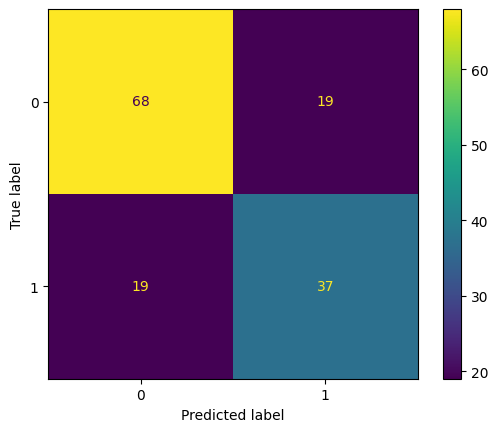

In [104]:
display=ConfusionMatrixDisplay(cm,display_labels=lr_model.classes_)
display.plot()

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [110]:
y_pred_knn=knn_model.predict(X_test_scaled)
y_pred_knn

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [111]:
accuracy_knn=accuracy_score(y_pred_knn,y_test)
accuracy_knn

0.7622377622377622

In [112]:
precision=precision_score(y_pred_knn,y_test)
precision

0.7321428571428571

In [113]:
recall=recall_score(y_pred_knn,y_test)
recall

0.6833333333333333

In [114]:
f1=f1_score(y_pred_knn,y_test)
f1

0.7068965517241379

In [116]:
cm_knn=confusion_matrix(y_pred_knn,y_test)
cm

array([[68, 15],
       [19, 41]])

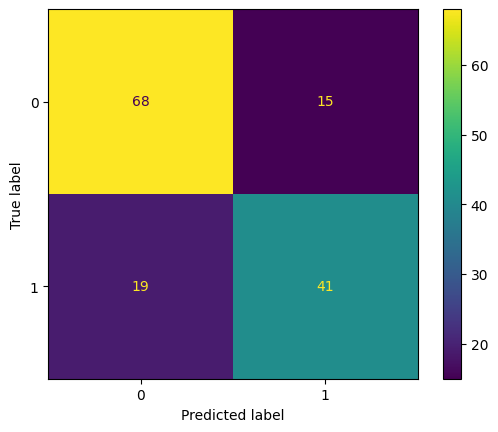

In [117]:
display=ConfusionMatrixDisplay(cm_knn,display_labels=knn_model.classes_)
display.plot()